# DSCI 631: Applied Machine Learning for Data Science
## Project Implementation
### Samuel Akinjole

## Breast Cancer Classification Using Machine Learning Algorithms

## Objectives

Breast cancer is a type of cancer that develops in the cells of the breast. It is one of the most common cancers affecting women worldwide. Early detection through regular breast screenings (mammograms, clinical breast exams) and awareness of potential symptoms (such as a lump in the breast, changes in breast size or shape, nipple discharge, or skin changes) are crucial for improving outcomes and treatment options for breast cancer. The  purpose for this proposal is to classify breast cancer using the "Breast Cancer Dataset" from Kaggle and published in the [Diagnostic Wisconsin Breast Cancer Database](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) . Here, the aim will be classifying tumors into malignant (cancerous) or benign (non cancerous) through machine learning algorithms.

## Exploratory Data Analysis (EDA)

In [1]:
#Loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('breast-cancer.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [2]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There is no catgeorical feature

Check for missing values:

In [4]:
df.isnull().sum().sum()

0

## Description of the Dataset

There are no missing values in the dataset. The dataset comprises of 32 columns and 569 instances. Upon inspection however, there are some rows with 0 values which are particular to the concave columns. This may mean an absence of concavity in the nucleus structure for those rows, but without more context to the dataset, I intend to keep these rows and the values. The source of the data is from the [breast cancer wisconsin diagnostic](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic). 

The features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, basically describing the characteristics of the cell nuclei present in the image. The diagnosis column is the outcome with M = Malignant and B = Benign. There are 10 main features of the dataset, which are computed for each cell nucleus. These ten features in the dataset are:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)

	The mean, standard error (SE), and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 continuous features. For example, field 4 is texture mean, field 14 is texture SE, field 24 is Worst texture.

In [5]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Text(0.5, 1.0, 'diagnosis')

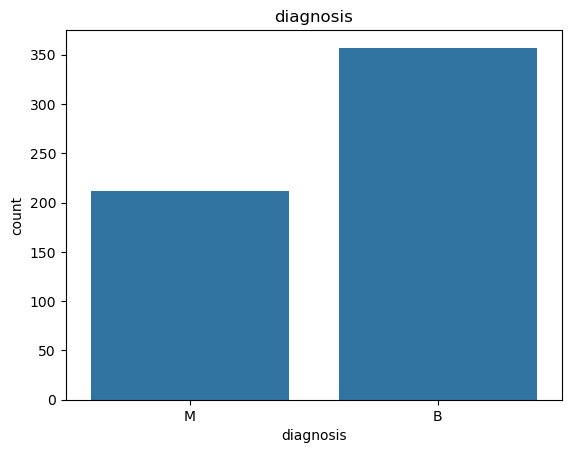

In [6]:
import seaborn as sns
sns.countplot(x=df['diagnosis'])
plt.title('diagnosis')

More benign cases to Malignant cases in the dataset.

### Distribution of features:
To examine the distribution, let's rearrange the features in the dataset for ease of comparison, the column ID will not be needed, and can be dropped.

In [7]:
df_arranged = df[['diagnosis', 'radius_mean', 'radius_se', 'radius_worst',
         'texture_mean', 'texture_se', 'texture_worst',
         'perimeter_mean', 'perimeter_se', 'perimeter_worst',
         'area_mean', 'area_se', 'area_worst',
         'smoothness_mean', 'smoothness_se', 'smoothness_worst',
         'compactness_mean', 'compactness_se', 'compactness_worst',
         'concavity_mean', 'concavity_se', 'concavity_worst',
         'concave points_mean', 'concave points_se', 'concave points_worst',
         'symmetry_mean', 'symmetry_se', 'symmetry_worst',
         'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']]
df_arranged.head()

diagnosis  radius_mean  radius_se  radius_worst  texture_mean  texture_se  \
0         M        17.99     1.0950         25.38         10.38      0.9053   
1         M        20.57     0.5435         24.99         17.77      0.7339   
2         M        19.69     0.7456         23.57         21.25      0.7869   
3         M        11.42     0.4956         14.91         20.38      1.1560   
4         M        20.29     0.7572         22.54         14.34      0.7813   

   texture_worst  perimeter_mean  perimeter_se  perimeter_worst  ...  \
0          17.33          122.80         8.589           184.60  ...   
1          23.41          132.90         3.398           158.80  ...   
2          25.53          130.00         4.585           152.50  ...   
3          26.50           77.58         3.445            98.87  ...   
4          16.67          135.10         5.438           152.20  ...   

   concavity_worst  concave points_mean  concave points_se  \
0           0.7119              0.14710            0.01587   
1           0.2416              0.07017            0.01340   
2           0.4504              0.12790            0.02058   
3           0.6869              0.10520            0.01867   
4           0.4000              0.10430            0.01885   

   concave points_worst  symmetry_mean  symmetry_se  symmetry_worst  \
0                0.2654         0.2419      0.03003          0.4601   
1                0.1860         0.1812      0.01389          0.2750   
2                0.2430         0.2069      0.02250          0.3613   
3                0.2575         0.2597      0.05963          0.6638   
4                0.1625         0.1809      0.01756          0.2364   

   fractal_dimension_mean  fractal_dimension_se  fractal_dimension_worst  
0                 0.07871              0.006193                  0.11890  
1                 0.05667              0.003532                  0.08902  
2                 0.05999              0.004571                  0.08758  
3                 0.09744              0.009208                  0.17300  
4                 0.05883              0.005115                  0.07678  

[5 rows x 31 columns]

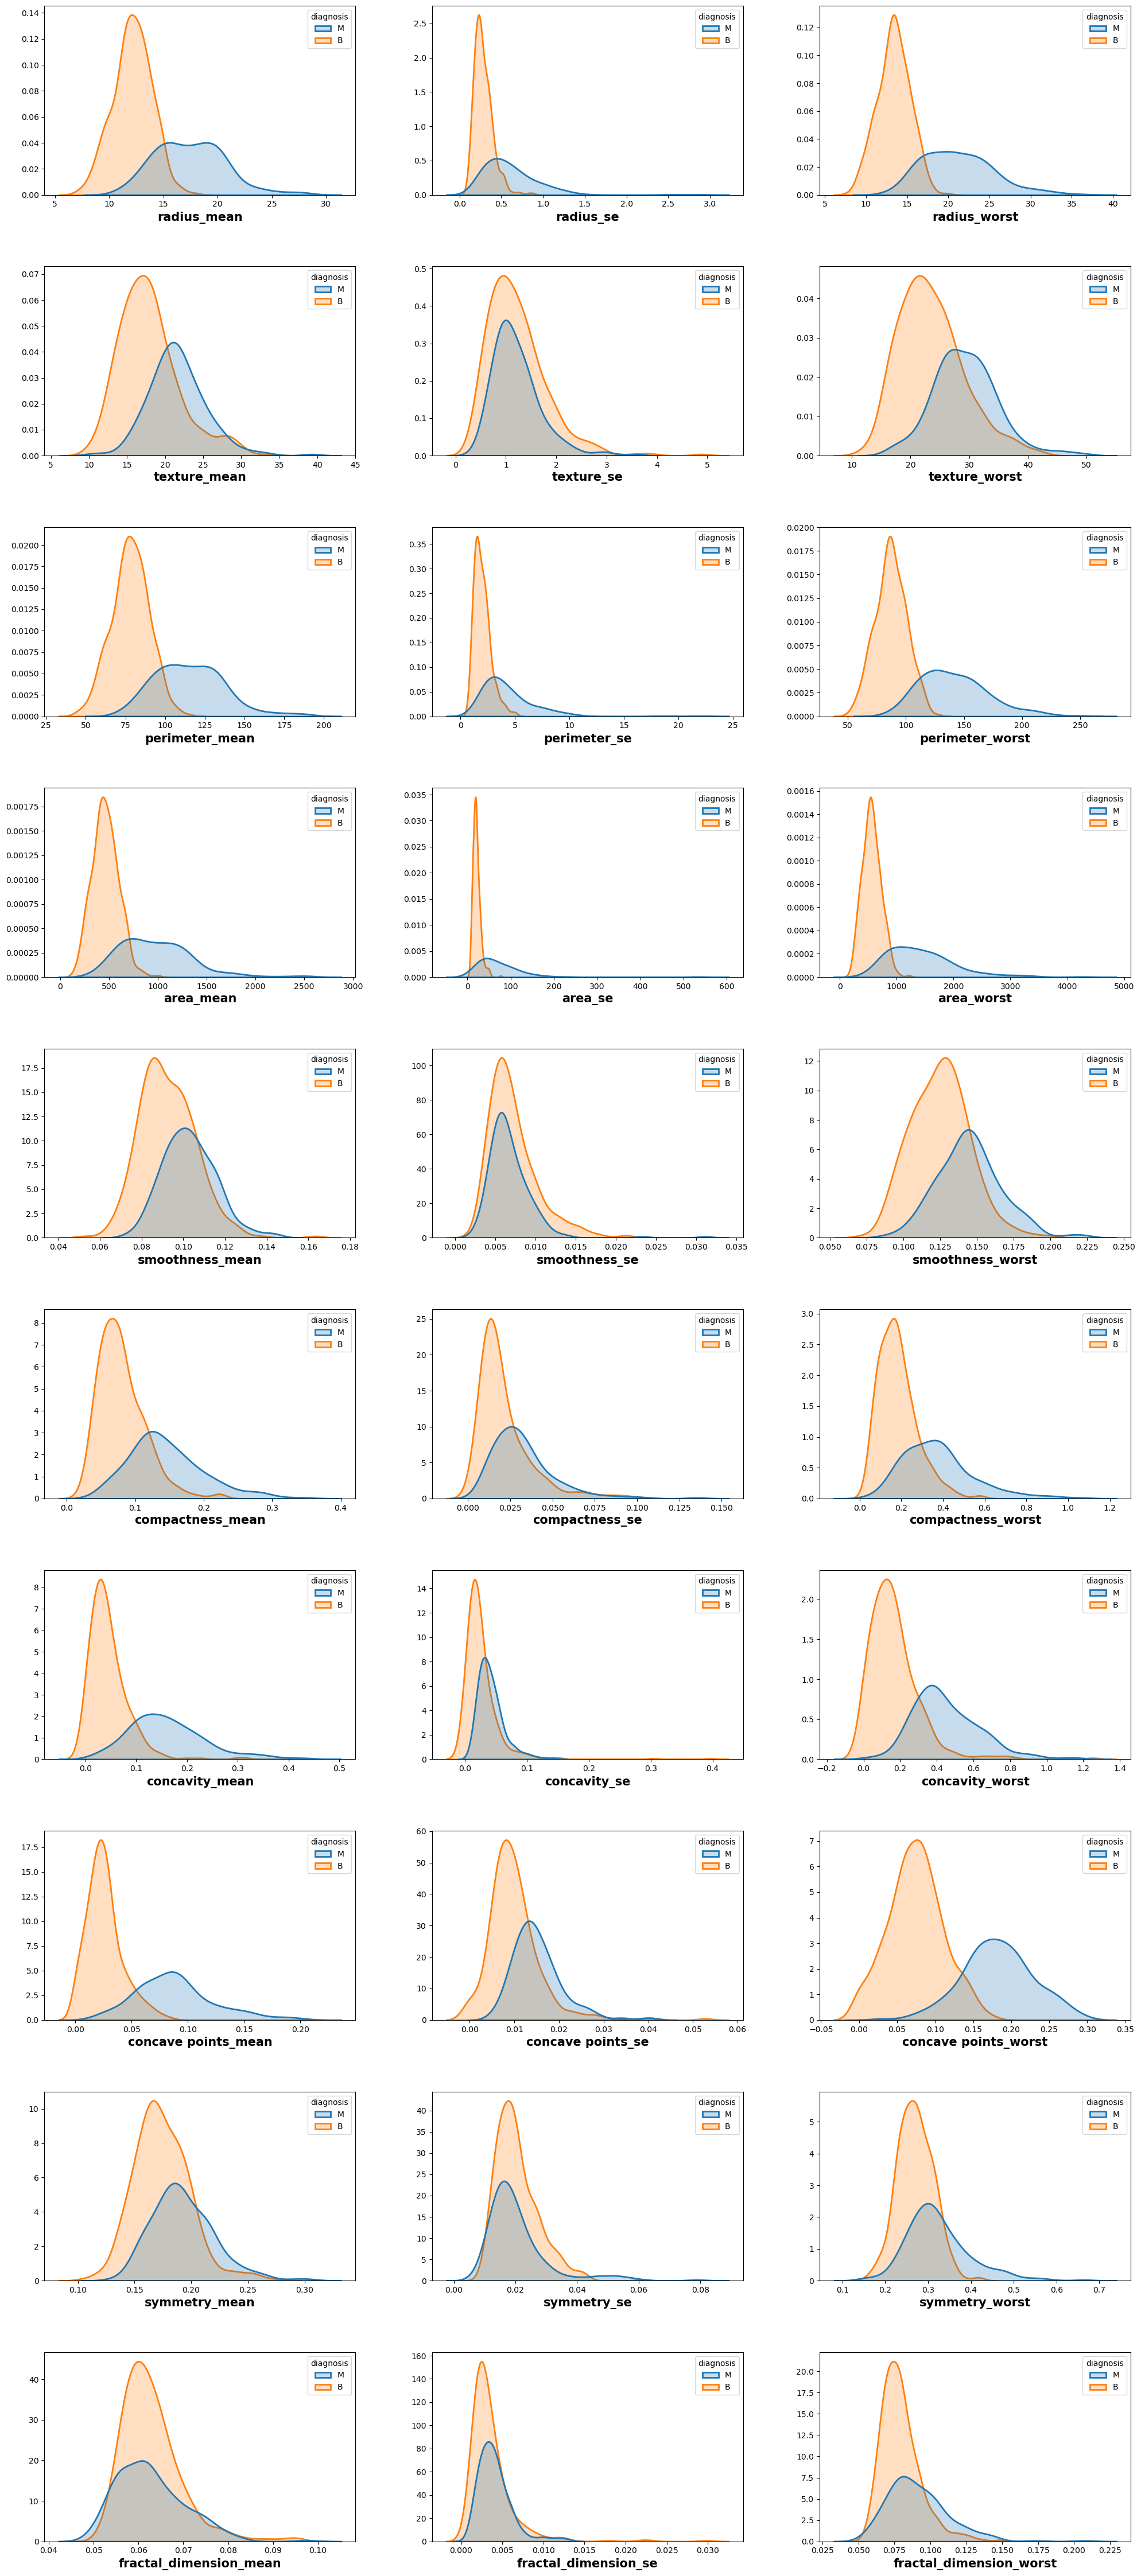

In [8]:
#Plot the distribution
fig, ax = plt.subplots(10, 3, figsize=(20, 45))
ax = ax.flatten()

for i, col in enumerate(df_arranged.columns[1:]):
    sns.kdeplot(x=col, data=df_arranged, ax=ax[i], fill=True, lw=2, hue = 'diagnosis')
    ax[i].set_xlabel(col, fontsize = 15, fontweight = 'bold')
    ax[i].set_ylabel('')
    
plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

### Algorithms to be Used

The task to be perfomed is a classification task. Algorithms I intend to use include:
- Random Forest
- Xgboost
- Support Vector Machine (SVM)
- Logistic Regression

It is also possible to use deep learning algorithms, particularly neural network classification

In short, for this project, I will be performing:
- Model Training 
- Model Evaluation
- Fine-Tunning and Validation
- Model Comparisons


Let's check the correlation of the features

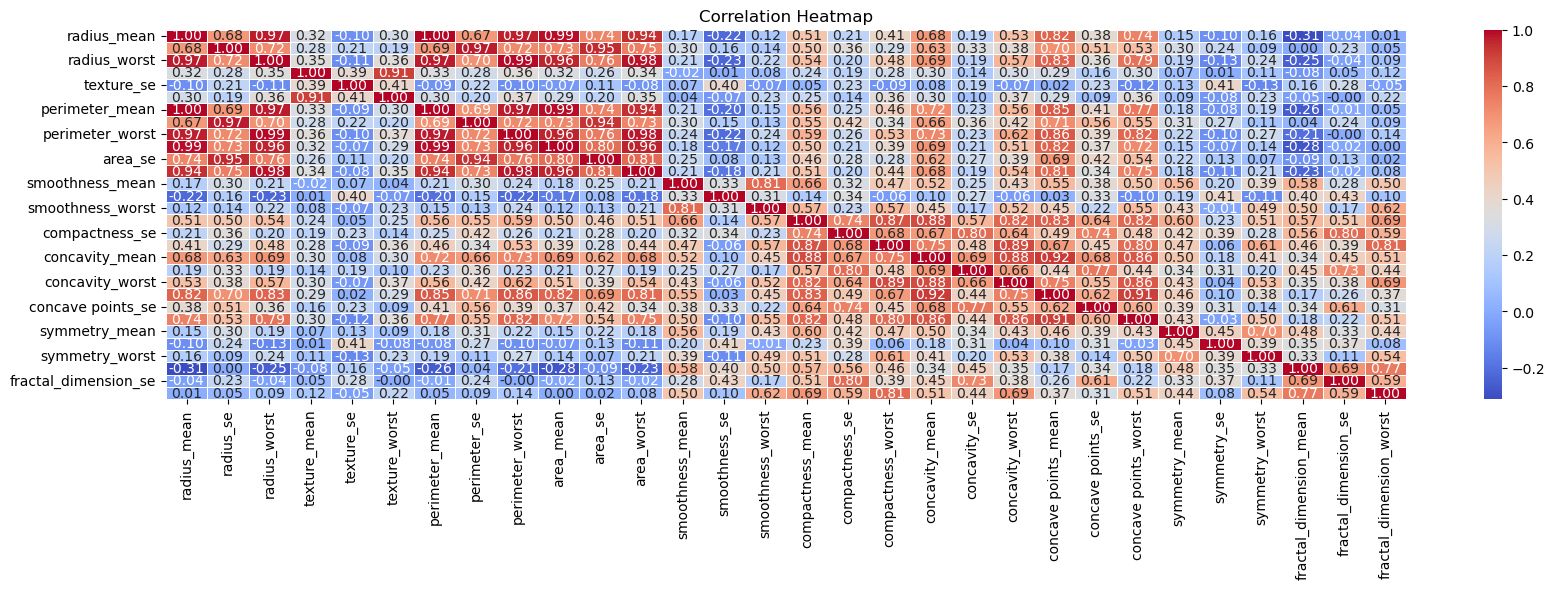

In [15]:
#Checking correlations
import seaborn as sns

corr_matrix = df_arranged.corr(numeric_only=True)

plt.figure().set_figwidth(20,16)
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt = '.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

As we expect, certain features are well correlated, such as the radius mean to the perimeter mean.

In setting up the machine learning models, the target label is not well balanced, and we can use stratified sampling. However the features do show that both outcome are represented.

In [24]:
# First we split the data
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_arranged, test_size=0.2, random_state=40, stratify=df_arranged['diagnosis'])
train.head()

diagnosis  radius_mean  radius_se  radius_worst  texture_mean  texture_se  \
559         B        11.51     0.2388         12.48         23.93       2.904   
288         B        11.26     0.4866         11.86         19.96       1.905   
17          M        16.13     0.5692         20.96         20.68       1.073   
15          M        14.54     0.3700         17.46         27.54       1.033   
383         B        12.39     0.2608         14.18         17.48       0.873   

     texture_worst  perimeter_mean  perimeter_se  perimeter_worst  ...  \
559          37.16           74.52         1.936            82.28  ...   
288          22.33           73.72         2.877            78.27  ...   
17           31.48          108.10         3.854           136.80  ...   
15           37.13           96.73         2.879           124.10  ...   
383          23.13           80.64         2.117            95.23  ...   

     concavity_worst  concave points_mean  concave points_se  \
559           0.3630              0.04105            0.01267   
288           0.1546              0.05588            0.03487   
17            0.4784              0.10280            0.01297   
15            0.7026              0.07364            0.01090   
383           0.3206              0.02880            0.01051   

     concave points_worst  symmetry_mean  symmetry_se  symmetry_worst  \
559               0.09653         0.1388      0.01488          0.2112   
288               0.09314         0.2595      0.03418          0.2955   
17                0.20730         0.2164      0.01689          0.3706   
15                0.17120         0.2303      0.01857          0.4218   
383               0.09804         0.1779      0.01838          0.2819   

     fractal_dimension_mean  fractal_dimension_se  fractal_dimension_worst  
559                 0.06570              0.004738                  0.08732  
288                 0.06233              0.006517                  0.07009  
17                  0.07356              0.004142                  0.11420  
15                  0.07077              0.005466                  0.13410  
383                 0.06588              0.006884                  0.11180  

[5 rows x 31 columns]

In [25]:
#Check the stratified sampling:
train['diagnosis'].value_counts()

diagnosis
B    285
M    170
Name: count, dtype: int64

In [26]:
#Check original Distribution of the target variable:
df_arranged['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

The data is well splitted, now we can move on to training our models:
First we need to encode the outcome label, since it is given as strings , 'M' and 'B'

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#separate predictors from target variable
X_train = train[[col for col in train.columns if col != 'diagnosis']]
y_train = le.fit_transform(train['diagnosis'])

X_test = test[[col for col in test.columns if col != 'diagnosis']]
y_test = le.transform(test['diagnosis'])

In [28]:
#Check the encoded labels
decoded_y = le.inverse_transform(y_test)

#Create a dataframe to display the original and encoded values:
mapping_df = pd.DataFrame({'Encoded': y_test, 'Original': decoded_y})
mapping_df.head()

Encoded Original
0        1        M
1        0        B
2        0        B
3        1        M
4        0        B

It is one 1 for Malignant and 0 for Benign. Time to train the models:

In [29]:
#create pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_columns = [col for col in X_train.columns if col not in categorical_columns]

# Define transformers for numerical and categorical columns
numerical_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Add handle_unknown='ignore' for unknown categories in test data
])

# Create ColumnTransformer to apply different transformations to numerical and categorical columns
full_pipeline = ColumnTransformer([
    ('numeric', numerical_pipeline, numerical_columns),
    ("cat", categorical_pipeline, categorical_columns),
])

#apply pipeline
X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.transform(X_test)

## Logistic Regression

I would use a balanced class weight

In [30]:
# Logistic Regression with hyperparameter tunning
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#defined hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  
    'solver': ['liblinear', 'saga'] 
}

lr = LogisticRegression(class_weight ='balanced', max_iter=1000)

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1) #Initialize gridsearch 

grid_search.fit(X_train, y_train) #fit the model

best_params = grid_search.best_params_
best_lr = grid_search.best_estimator_

lr_pred = best_lr.predict(X_test)
print('Best Parameters:', best_params)
print()
print('Accuracy', metrics.accuracy_score(y_test, lr_pred))
print()
print(metrics.classification_report(y_test, lr_pred))

/Users/soa52/opt/anaconda3/envs/info/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/soa52/opt/anaconda3/envs/info/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/soa52/opt/anaconda3/envs/info/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/soa52/opt/anaconda3/envs/info/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/soa52/opt/anaconda3/envs/info/lib/python3.12/site-packages/sklearn/linear_model/_

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Accuracy 0.9473684210526315

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



/Users/soa52/opt/anaconda3/envs/info/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/soa52/opt/anaconda3/envs/info/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/soa52/opt/anaconda3/envs/info/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/soa52/opt/anaconda3/envs/info/lib/python3.12/site-pac

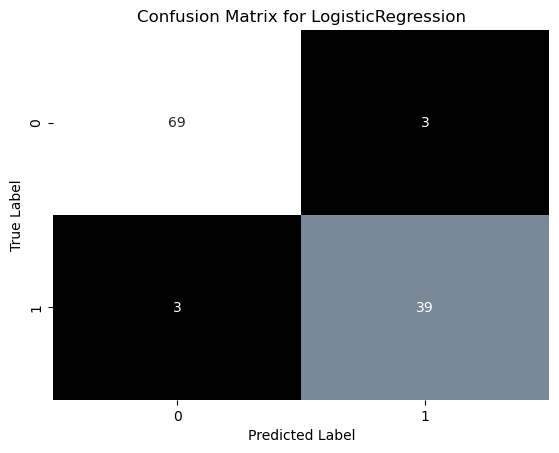

In [31]:
#Lets print out the confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, lr_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bone', cbar=False)
plt.title('Confusion Matrix for LogisticRegression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Random Forest

In [32]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

#Defined hyperparameter grid
param_grid_rf = [
    # 'n_estimators': [100, 200, 300],
    # 'max_depth': [10, 20, 30],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['sqrt', 'log2'],
    # 'bootstrap': [True, False]
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8, 10]},
    # then try 6 (2×3) combinations with bootstrap set as False
]

rf = RandomForestClassifier(class_weight ='balanced')

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params_rf = grid_search.best_params_
best_rf = grid_search.best_estimator_

rf_pred = best_rf.predict(X_test)
print('Best Parameters:', best_params_rf)
print()
print('Accuracy', metrics.accuracy_score(y_test, rf_pred))
print()
print(metrics.classification_report(y_test, rf_pred))

Best Parameters: {'max_features': 8, 'n_estimators': 100}

Accuracy 0.9210526315789473

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        72
           1       0.90      0.88      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



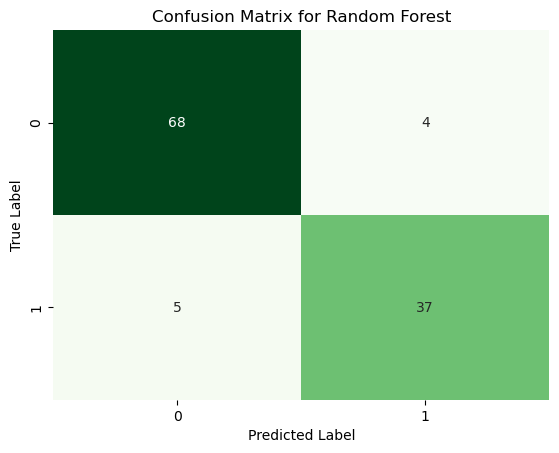

In [34]:
#Lets print out the confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, rf_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Xgboost

In [35]:
# Import the necessary libraries
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],            # Number of boosting rounds
    'max_depth': [3, 6, 9],                    # Maximum depth of the tree
    'learning_rate': [0.01, 0.1, 0.3],         # Learning rate (eta)
    'subsample': [0.8, 1.0],                   # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],            # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],                    # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'reg_alpha': [0, 0.01, 0.1],               # L1 regularization term on weights
    'reg_lambda': [1, 1.5, 2.0]                # L2 regularization term on weights
}

# Set up GridSearchCV with the XGBoost classifier and the hyperparameter grid
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, 
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params_xgb = grid_search_xgb.best_params_
best_xgb = grid_search_xgb.best_estimator_

# Make predictions using the best estimator
xgb_pred = best_xgb.predict(X_test)

# Print the best parameters, accuracy, and classification report
print('Best Parameters:', best_params_xgb)
print()
print('Accuracy:', accuracy_score(y_test, xgb_pred))
print()
print(classification_report(y_test, xgb_pred))

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.

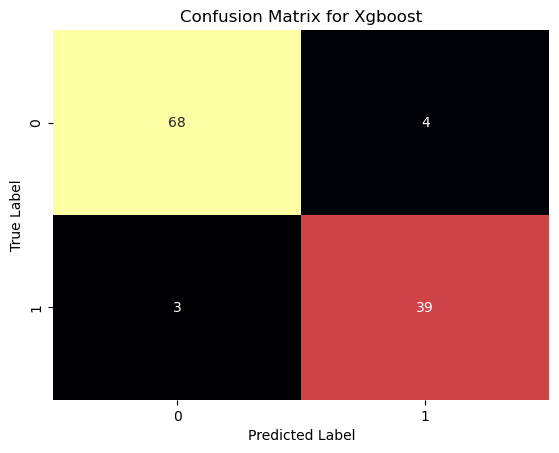

In [37]:
#Lets print out the confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, xgb_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno', cbar=False)
plt.title('Confusion Matrix for Xgboost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Explanation of Hyperparameters:
- n_estimators: Number of boosting rounds.
- max_depth: Maximum depth of the tree. Increasing this value makes the model more complex and likely to overfit.
- learning_rate: Step size shrinkage used to prevent overfitting. After each boosting step, we can directly get the weights of new features. It scales the contribution of each tree by learning_rate.
- subsample: Subsample ratio of the training instances. Setting it to 0.8 means that XGBoost would randomly sample 80% of the training data prior to growing trees.
- colsample_bytree: Subsample ratio of columns when constructing each tree.
- gamma: Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger, the more conservative the algorithm will be.
- reg_alpha: L1 regularization term on weights (default 0). Can be used to make the algorithm more conservative.
- reg_lambda: L2 regularization term on weights (default 1). Can be used to make the algorithm more conservative.

## Support Vector Machine (SVM)

In [43]:
# Support Vector Classifier with hyperparameter tuning
from sklearn.svm import SVC

#Defined hyperparameter grid:
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

svc = SVC(class_weight ='balanced')

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params_svc = grid_search.best_params_
best_svc = grid_search.best_estimator_

SVC_pred = best_svc.predict(X_test) #predict using the best model
print('Best Parameters:', best_params_svc)
print()
print('Accuracy', metrics.accuracy_score(y_test, SVC_pred))
print()
print(metrics.classification_report(y_test, SVC_pred))

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Accuracy 0.956140350877193

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



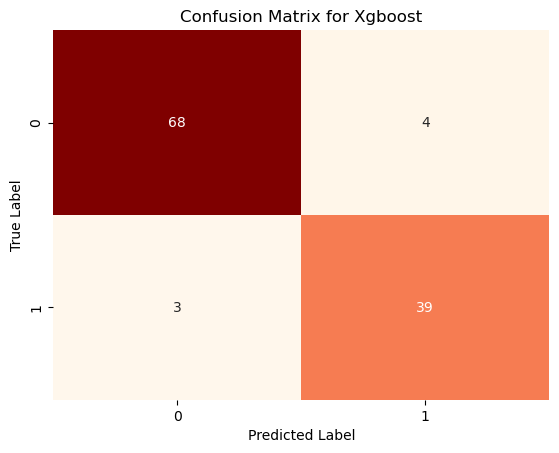

In [45]:
#Lets print out the confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, xgb_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd', cbar=False)
plt.title('Confusion Matrix for Xgboost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix from left to right is TP, FP, FN, TN

## Model Comparisons



Let us create a comprehensive comparison:

Accuracy Comparison Table:
                 Model  Accuracy
0  Logistic Regression  0.947368
1        Random Forest  0.921053
2              XGBoost  0.938596
3                  SVM  0.956140

Detailed Metrics Table:
    precision    recall  f1-score  support                Model        Metric
0    0.958333  0.958333  0.958333     72.0  Logistic Regression             0
1    0.928571  0.928571  0.928571     42.0  Logistic Regression             1
2    0.943452  0.943452  0.943452    114.0  Logistic Regression     macro avg
3    0.947368  0.947368  0.947368    114.0  Logistic Regression  weighted avg
4    0.931507  0.944444  0.937931     72.0        Random Forest             0
5    0.902439  0.880952  0.891566     42.0        Random Forest             1
6    0.916973  0.912698  0.914749    114.0        Random Forest     macro avg
7    0.920798  0.921053  0.920849    114.0        Random Forest  weighted avg
8    0.957746  0.944444  0.951049     72.0              XGBoost             0
9  

/var/folders/nh/3_21ntrj7_s4f7yh6vfrk7k4p0d886/T/ipykernel_31647/3921100655.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette=palette)
/var/folders/nh/3_21ntrj7_s4f7yh6vfrk7k4p0d886/T/ipykernel_31647/3921100655.py:84: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y='precision', data=metrics_to_plot, palette=palette, ci=None)
/var/folders/nh/3_21ntrj7_s4f7yh6vfrk7k4p0d886/T/ipykernel_31647/3921100655.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='precision', data=metrics_to_plot, palette=palette, ci=None)
/var/folders/nh/3_21ntrj7_s4f7yh6vfrk7k4p0

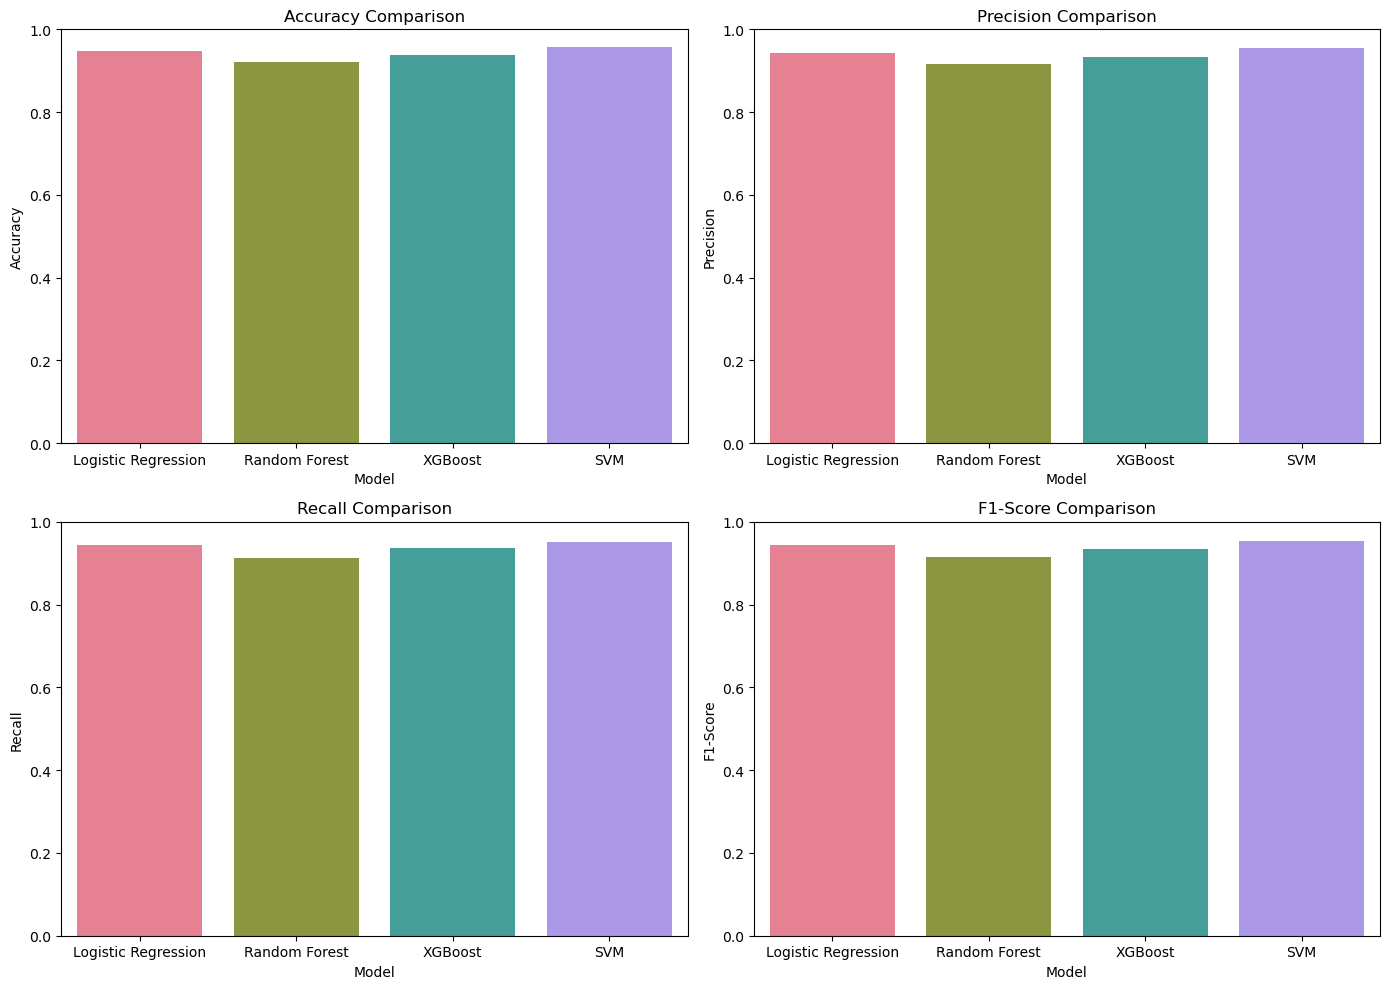

In [54]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define models and their predictions
models = {
    'Logistic Regression': {
        'best_params': best_lr,  # best params for lr
        'pred': lr_pred                 # Prediction for lr
    },
    'Random Forest': {
        'best_params': best_params_rf,  # Best params for rf
        'pred': rf_pred                 # Predictions for rf
    },
    'XGBoost': {
        'best_params': best_params_xgb, # Best params for xgb
        'pred': xgb_pred                # Predictions for xgb
    },
    'SVM': {
        'best_params': best_params_svc, # Best params for svc
        'pred': SVC_pred               # Predictions for SVC
    }
}

# Initialize lists to store results
model_names = []
accuracies = []
detailed_metrics = []

# Calculate performance metrics for each model
for model_name, model_info in models.items():
    pred = model_info['pred']
    accuracy = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred, output_dict=True)
    
    model_names.append(model_name)
    accuracies.append(accuracy)
    
    # Flatten the report dictionary and add the model name as a column
    for metric, values in report.items():
        if isinstance(values, dict):
            values['Model'] = model_name
            values['Metric'] = metric
            detailed_metrics.append(values)

# Create a DataFrame for accuracies
accuracy_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Print accuracy comparison table
print("Accuracy Comparison Table:")
print(accuracy_df)

# Create a DataFrame for detailed metrics
metrics_df = pd.DataFrame(detailed_metrics)

# Print detailed metrics table
print("\nDetailed Metrics Table:")
print(metrics_df)

# Define the color palette
palette = sns.color_palette("husl", len(models))

# Filter the metrics DataFrame to only include precision, recall, and f1-score for the classes '0' and '1'
metrics_to_plot = metrics_df[metrics_df['Metric'].isin(['0', '1'])]

# Plot accuracy
plt.figure(figsize=(14, 10))

# Accuracy plot
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette=palette)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)

# Precision plot
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='precision', data=metrics_to_plot, palette=palette, ci=None)
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.xlabel('Model')
plt.ylim(0, 1)

# Recall plot
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='recall', data=metrics_to_plot, palette=palette, ci=None)
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.xlabel('Model')
plt.ylim(0, 1)

# F1-score plot
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='f1-score', data=metrics_to_plot, palette=palette, ci=None)
plt.title('F1-Score Comparison')
plt.ylabel('F1-Score')
plt.xlabel('Model')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


## Observation

From the results presented in the accuracy comparison table and detailed metrics table:

### Accuracy Comparison:

- SVM has the highest accuracy at 0.956140, followed closely by Logistic Regression at 0.947368. XGBoost also performs well with an accuracy of 0.938596. Random Forest has the lowest accuracy among the models at 0.921053.
Precision, Recall, and F1-Score:

### Precision, Recall, and F1-Score:

- Looking at precision, recall, and f1-score for each class ('0' and '1') and their averages (macro avg and weighted avg), SVM generally outperforms the other models, especially in terms of precision and f1-score. Logistic Regression also shows strong performance across these metrics, with slightly lower scores compared to SVM. XGBoost and Random Forest perform comparably but with slightly lower scores compared to SVM and Logistic Regression.

In summary, based on these results:

- SVM appears to be the best-performing model overall, especially in terms of precision and f1-score.
- Logistic Regression also performs well and is close to SVM in terms of accuracy.
- XGBoost and Random Forest perform slightly lower than SVM and Logistic Regression but still provide decent classification results.